Nombre: David Díaz Paz y Puente | Matricula: 650794

# A1.2 - Regresión Lineal

## 1. Introducción

La felicidad es un fenómeno complejo que integra factores económicos, sociales y de bienestar, lo que dificulta su medición directa. No obstante, el World Happiness Report ha desarrollado una metodología que permite estimar y comparar el nivel promedio de felicidad entre distintos países. Uno de los factores más comúnmente asociados a este indicador es el producto interno bruto (GDP); sin embargo, analizar la felicidad únicamente a partir de una variable económica resulta limitado y no refleja la naturaleza multidimensional del bienestar social.

En esta actividad se analiza la relación entre el nivel de felicidad y diversas variables económicas y sociales mediante modelos de regresión lineal. Inicialmente, se emplea un modelo de regresión lineal simple para evaluar la asociación entre la felicidad y una variable explicativa principal. Posteriormente, el análisis se extiende a un modelo de regresión lineal múltiple, incorporando variables adicionales obtenidas de fuentes públicas y confiables, con el objetivo de mejorar la capacidad explicativa del modelo.

El reporte documenta el proceso de exploración de datos, la construcción de los modelos y la interpretación de los resultados a través de texto, tablas y figuras, concluyendo con una comparación crítica entre los modelos y una reflexión sobre sus alcances y limitaciones.

In [34]:
import pandas as pd

ruta = f'felicidad_gdp.csv'
df = pd.read_csv(ruta)

## 2. Metodología

Para el desarrollo del presente análisis se utilizó el archivo “felicidad_gdp.csv”, el cual contiene información correspondiente al nivel de felicidad reportado en el año 2022 y el producto interno bruto (GDP) del año 2020 para un conjunto de países. El índice de felicidad proviene del World Happiness Report, mientras que el GDP se emplea como un indicador del nivel de desarrollo económico de cada nación.

### Primeros 5 datos de la base de datos:

In [35]:
print(df.head())


          Pais  Felicidad           GDP
0      Finland     7.8210  2.720000e+11
1      Denmark     7.6362  3.560000e+11
2      Iceland     7.5575  2.171808e+10
3  Switzerland     7.5116  7.520000e+11
4  Netherlands     7.4149  9.140000e+11


### Información general

In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pais       141 non-null    object 
 1   Felicidad  141 non-null    float64
 2   GDP        141 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.4+ KB
None


En total tenemos un listado de 141 países que componen la base de datos con las variables de cada país siendo "GDP" (variable explicativa) y "Felicidad" (variable de respuesta), como fue mencionado anteriormente. Para el análisis inicial se seleccionó el producto interno bruto (GDP) como variable explicativa, dado que este indicador refleja el nivel de desarrollo económico y las condiciones materiales de los países. Ambas de estas variables son de carácter cuantitativo, lo que nos da el primer indicio hacia un problema de regresión. A continuación se presentan diagramas de dispersión de acuerdo con los datos presentes. 

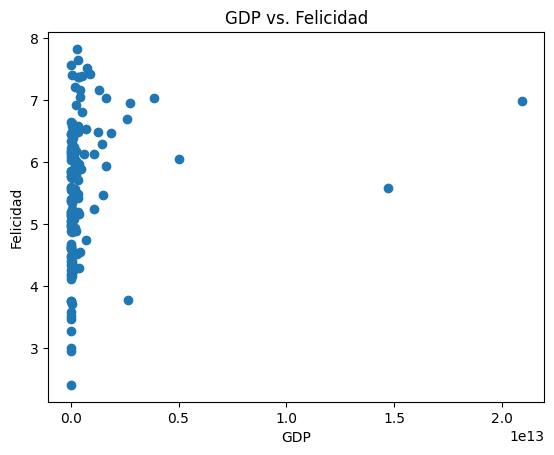

In [37]:
y = df.Felicidad
x = df.GDP

%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.ylabel("Felicidad")
plt.xlabel("GDP")
plt.title("GDP vs. Felicidad")
plt.show()

Como podemos ver, la escala que utilizan los valores de la variable "GDP" no es completamente consistente. Debido a que existe variación en el orden de magnitud, se aplicará una transformación logaritmica para poder hacer un análisis visual más claro del diagrama de dispersión "GDP vs. Felicidad" sin perder una característica vital para la variable "GDP"; el orden de magnitud, y así poder encontrar una relación entre ambas variables. 

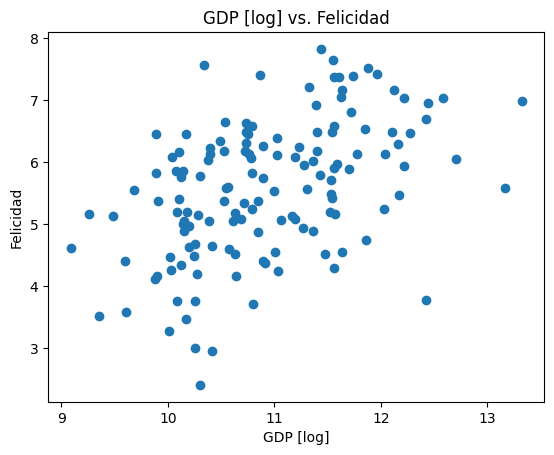

In [56]:
import numpy as np

x_log = np.log10(x)

plt.scatter(x_log, y)
plt.ylabel("Felicidad")
plt.xlabel("GDP [log]")
plt.title("GDP [log] vs. Felicidad")
plt.show()

A partir de la exploración gráfica, se observa una relación positiva general entre el GDP y el nivel de felicidad, en otras palabras: los países con mayores niveles de ingreso tienden a reportar mayores niveles de felicidad. No obstante, la dispersión de los datos sugiere que esta relación no es estrictamente lineal y que existen diferencias significativas entre países con niveles económicos similares.  

### Coeficientes óptimos para demostrar una relación lineal

In [57]:
xBar = np.mean(x_log)
yBar = np.mean(y)
B1num = sum((x_log-xBar)*(y-yBar))
B1den = sum((x_log-xBar)**2)
B1 = B1num / B1den
B0 = yBar - (B1*xBar)
print("B0 =",B0)
print("B1 =",B1)

B0 = -1.3012360953433797
B1 = 0.6280216697450538


### Regresión Lineal Simple

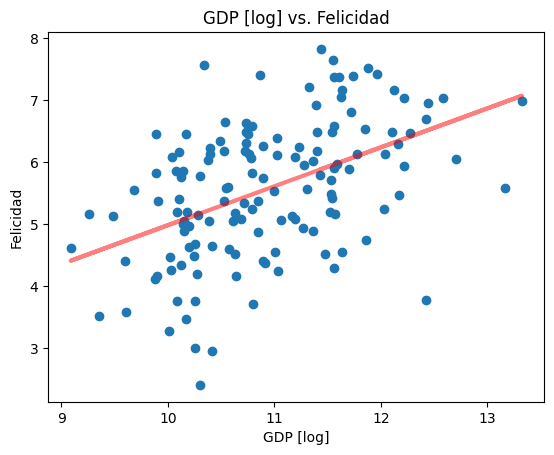

In [58]:
plt.scatter(x_log, y)
plt.ylabel("Felicidad")
plt.xlabel("GDP [log]")
plt.title("GDP [log] vs. Felicidad")
yHat = B0 + B1*x_log
plt.plot(x_log, yHat, c = "r", linewidth = 3, alpha = 0.5)
plt.show()

El análisis de la felicidad utilizando únicamente el GDP presenta limitaciones importantes, ya que el bienestar de una sociedad es un fenómeno multidimensional. Factores sociales, institucionales y de salud, entre otros, también influyen de manera significativa en la percepción de felicidad. En consecuencia, el uso de una sola variable explicativa resulta insuficiente para capturar la complejidad del fenómeno, lo que justifica la incorporación de variables adicionales en etapas posteriores del análisis.

### Resultados del modelo de regresión lineal simple

In [61]:
RSS = sum((y - yHat)**2)
print("RSS =", RSS)

n = len(x)
SEB1 = np.sqrt(RSS / ((n-2)*sum((x_log-xBar)**2)))
print("SE (B1) =",SEB1)

import scipy.stats as st
per = st.t.interval(confidence = 0.95, df = n-2)[1]
CIlow = B1 - per*SEB1
CIhigh = B1 + per*SEB1
print("Inervalo de confianza: (",CIlow,",",CIhigh,")")

RSS = 131.379585014422
SE (B1) = 0.0998266715050003
Inervalo de confianza: ( 0.430646598536772 , 0.8253967409533356 )


El modelo de regresión lineal simple fue evaluado mediante el cálculo del error residual total (RSS), obteniéndose un valor de 131.38, lo cual indica que una parte importante de la variabilidad del nivel de felicidad no es explicada únicamente por el GDP. No obstante, este resultado es consistente con la naturaleza multifactorial del fenómeno analizado.

El error estándar del coeficiente asociado al GDP en escala logarítmica fue de 0.0998, lo que sugiere una estimación relativamente precisa de la pendiente del modelo. Asimismo, el intervalo de confianza al 95 % para dicho coeficiente se encuentra en el rango (0.43, 0.83). Dado que este intervalo no incluye el valor cero, se concluye que la relación entre el GDP y el nivel de felicidad es estadísticamente significativa.

Estos resultados indican la existencia de una asociación positiva entre el desarrollo económico y la felicidad promedio de los países. Sin embargo, la magnitud del error residual pone de manifiesto que el GDP, por sí solo, no es suficiente para explicar completamente las diferencias observadas en los niveles de felicidad, lo que justifica la incorporación de variables adicionales en un modelo de regresión múltiple.